In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
df=pd.read_csv("Book5.csv")
data= df.loc[1:49, ['EMPLOYEE_ID','Employee_name','AVERAGE_SCORE_of_Level_1','PRE_Test_Score','Post_Test_Score','Improvement_In_Score','MANAGER_RATING','PRE_TRAINING_RESULT','POST_TRAINING_RESULT','KPI-1','KPI-2','Pre_Training_Revenue','Training_Cost','Salary_Loss_During_Training','Post_Training_Revenue','Training_Duration','Profit','Net_Profit','Total_Investment']]
data

,EMPLOYEE_ID,Employee_name,AVERAGE_SCORE_of_Level_1,PRE_Test_Score,Post_Test_Score,Improvement_In_Score,MANAGER_RATING,PRE_TRAINING_RESULT,POST_TRAINING_RESULT,KPI-1,KPI-2,Pre_Training_Revenue,Training_Cost,Salary_Loss_During_Training,Post_Training_Revenue,Training_Duration,Profit,Net_Profit,Total_Investment
1,E052,Edith Beard,7.00,190.0,209.0,19.0,10.0,146.0,150.0,543.0,570.0,55000.0,6000.0,2500.0,75000.0,3.0,20000.0,11500.0,8500.0
2,E069,Edna Adkins,8.50,190.0,230.0,40.0,4.0,161.0,190.0,523.0,602.0,60000.0,7000.0,3000.0,80000.0,3.0,20000.0,10000.0,10000.0
3,E074,Josephine Koch,6.50,125.0,144.0,19.0,3.0,107.0,200.0,521.0,583.0,52000.0,4000.0,1500.0,68000.0,2.0,16000.0,10500.0,5500.0
4,E076,Rosa Chandler,9.00,158.0,178.0,20.0,6.0,172.0,200.0,501.0,499.0,61000.0,4500.0,2000.0,82000.0,3.0,21000.0,14500.0,6500.0
5,E080,Nora Bolton,7.00,194.0,234.0,40.0,2.0,137.0,150.0,511.0,492.0,53000.0,6000.0,2500.0,74000.0,3.0,21000.0,12500.0,8500.0
6,E094,Maud Bentley,7.00,132.0,172.0,40.0,10.0,161.0,170.0,489.0,556.0,57000.0,5500.0,3000.0,77000.0,2.0,20000.0,11500.0,8500.0
7,E109,Eliza Barker,6.67,122.0,122.0,0.0,3.0,151.0,170.0,510.0,492.0,54000.0,5000.0,2200.0,76000.0,3.0,22000.0,12800.0,7200.0
8,E127,Cameron Lo,8.50,170.0,170.0,0.0,6.0,117.0,150.0,519.0,507.0,58000.0,5200.0,2500.0,79000.0,3.0,21000.0,12500.0,7700.0
9,E128,Harper Castillo,9.00,147.0,166.0,19.0,2.0,155.0,190.0,551.0,560.0,56000.0,4800.0,2300.0,78000.0,3.0,22000.0,12900.0,7100.0
10,E131,Jade Hu,9.00,126.0,145.0,19.0,7.0,174.0,190.0,524.0,531.0,55000.0,4700.0,2400.0,76000.0,3.0,21000.0,12300.0,7100.0


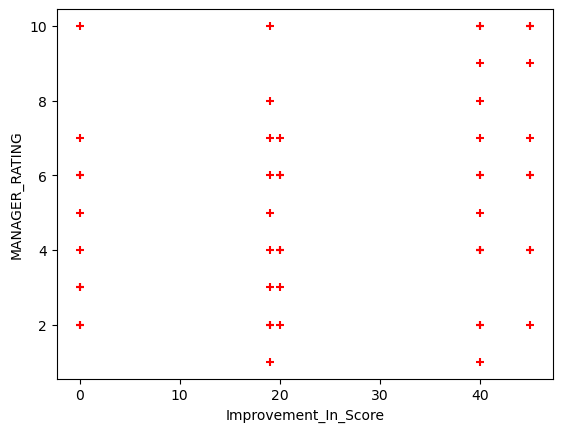

In [21]:
%matplotlib inline
plt.xlabel('Improvement_In_Score')
plt.ylabel('MANAGER_RATING')
plt.scatter(df.Improvement_In_Score,df.MANAGER_RATING,color='red',marker='+')

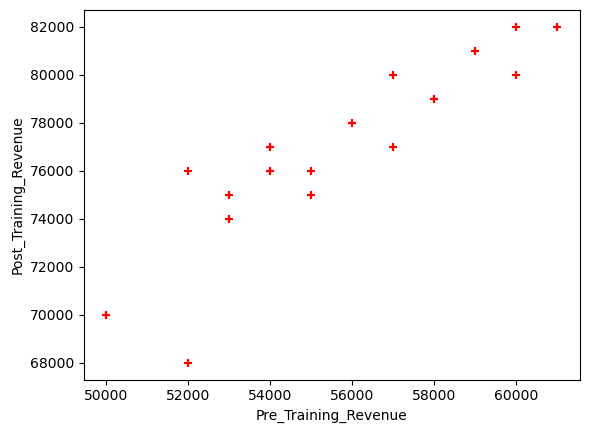

In [22]:
%matplotlib inline
plt.xlabel('Pre_Training_Revenue')
plt.ylabel('Post_Training_Revenue')
plt.scatter(df.Pre_Training_Revenue,df.Post_Training_Revenue,color='red',marker='+')

In [23]:
reg= linear_model.LinearRegression()
reg.fit(data[['AVERAGE_SCORE_of_Level_1','PRE_Test_Score','Post_Test_Score','Improvement_In_Score','PRE_TRAINING_RESULT','POST_TRAINING_RESULT']],data.MANAGER_RATING)

LinearRegression()

In [24]:
reg.coef_

array([ 3.07788419e-01,  6.38983072e+12, -6.38983072e+12,  6.38983072e+12,
        7.03118620e-02, -7.16759376e-02])

In [25]:
reg.predict([[6.67,122.0,122.0,0.0,151.0,170.0]] )

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.71995541])

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


In [27]:
print(data.describe())


       AVERAGE_SCORE_of_Level_1  PRE_Test_Score  Post_Test_Score  \
count                 49.000000       49.000000        49.000000   
mean                   8.030612      156.224490       182.244898   
std                    1.531488       29.209206        36.004358   
min                    2.500000      102.000000       102.000000   
25%                    7.000000      133.000000       155.000000   
50%                    8.500000      155.000000       178.000000   
75%                    9.000000      182.000000       211.000000   
max                   10.000000      199.000000       242.000000   

       Improvement_In_Score  MANAGER_RATING  PRE_TRAINING_RESULT  \
count             49.000000       49.000000            49.000000   
mean              26.020408        5.244898           159.326531   
std               16.745011        2.704399            27.233854   
min                0.000000        1.000000           107.000000   
25%               19.000000        3.000000    

In [28]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 1 to 49
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EMPLOYEE_ID                  49 non-null     object 
 1   Employee_name                49 non-null     object 
 2   AVERAGE_SCORE_of_Level_1     49 non-null     float64
 3   PRE_Test_Score               49 non-null     float64
 4   Post_Test_Score              49 non-null     float64
 5   Improvement_In_Score         49 non-null     float64
 6   MANAGER_RATING               49 non-null     float64
 7   PRE_TRAINING_RESULT          49 non-null     float64
 8   POST_TRAINING_RESULT         49 non-null     float64
 9   KPI-1                        49 non-null     float64
 10  KPI-2                        49 non-null     float64
 11  Pre_Training_Revenue         49 non-null     float64
 12  Training_Cost                49 non-null     float64
 13  Salary_Loss_During_Tra

ValueError: num must be an integer with 1 <= num <= 6, not 7

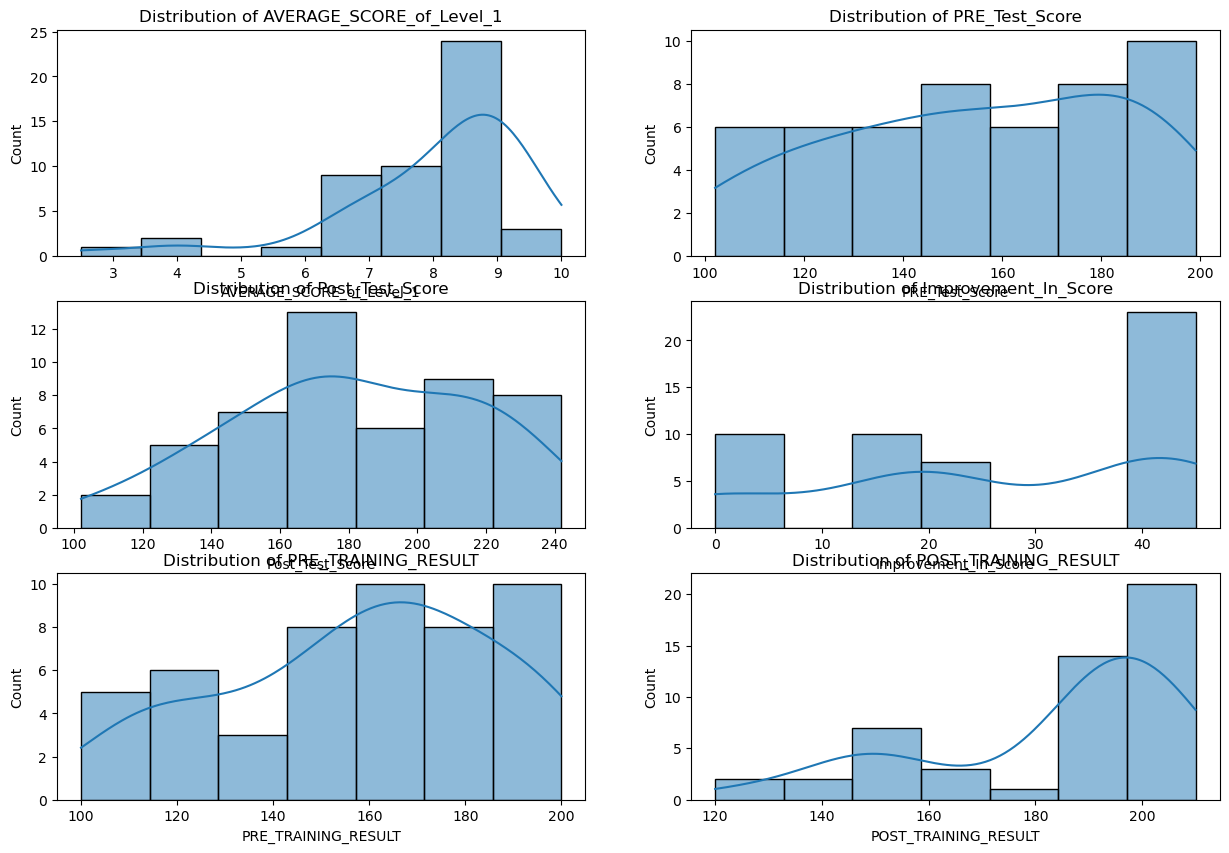

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of numerical features
numerical_features = ['AVERAGE_SCORE_of_Level_1','PRE_Test_Score','Post_Test_Score','Improvement_In_Score','PRE_TRAINING_RESULT','POST_TRAINING_RESULT','MANAGER_RATING']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
